#**Sales Data Analysis**

**by Bujji Saikam**

###**Objective**

To analyze a sizable sales dataset to find patterns, identify best-selling items, and compute revenue indicators, enabling data-driven decision-making for improving sales tactics.

####**1. Data Overview**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load the dataset
sales_data = pd.read_excel('/content/sample_data/ECOMM DATA.xlsx')

In [3]:
# Display the first few rows of the dataset
sales_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [4]:
# Get a summary of the dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [5]:
# Check for missing values
sales_data.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0


####**1. Data Processing**

To ensure the data is clean and ready for analysis, handle missing values, duplicates, and correct data types.

In [6]:
# Handle missing values
sales_data = sales_data.dropna()  # Drop rows with missing values (or use imputation if necessary)
sales_data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
8,40155,CA-2014-135909,2014-10-14,2014-10-21,Standard Class,JW-15220,Jane Waco,Corporate,Sacramento,California,...,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.960,5,0.2,1906.4850,867.69,Low
9,40936,CA-2012-116638,2012-01-28,2012-01-31,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,...,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124,865.74,Critical
10,34577,CA-2011-102988,2011-04-05,2011-04-09,Second Class,GM-14695,Greg Maxwell,Corporate,Alexandria,Virginia,...,OFF-SU-10002881,Office Supplies,Supplies,Martin Yale Chadless Opener Electric Letter Op...,4164.050,5,0.0,83.2810,846.54,High
16,36178,CA-2014-143567,2014-11-03,2014-11-06,Second Class,TB-21175,Thomas Boland,Corporate,Henderson,Kentucky,...,TEC-AC-10004145,Technology,Accessories,Logitech diNovo Edge Keyboard,2249.910,9,0.0,517.4793,780.70,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51270,38414,CA-2011-143168,2011-10-18,2011-10-23,Second Class,IG-15085,Ivan Gibson,Consumer,Seattle,Washington,...,OFF-BI-10003784,Office Supplies,Binders,Computer Printout Index Tabs,1.344,1,0.2,0.4704,0.03,Medium
51276,31558,US-2014-155299,2014-06-09,2014-06-13,Standard Class,Dl-13600,Dorris liebe,Corporate,Pasadena,Texas,...,OFF-AP-10002203,Office Supplies,Appliances,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.624,2,0.8,-4.4660,0.02,Medium
51277,37361,CA-2012-111780,2012-12-25,2012-12-30,Second Class,RA-19285,Ralph Arnett,Consumer,San Diego,California,...,OFF-PA-10001667,Office Supplies,Paper,Great White Multi-Use Recycled Paper (20Lb. an...,17.940,3,0.0,8.0730,0.02,High
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium


In [7]:
# Convert date columns to datetime format
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data['Order Date']

,Order Date
0,2012-07-31
8,2014-10-14
9,2012-01-28
10,2011-04-05
16,2014-11-03
...,...
51270,2011-10-18
51276,2014-06-09
51277,2012-12-25
51286,2014-06-20


In [8]:
# Remove duplicates
sales_data = sales_data.drop_duplicates()
sales_data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
8,40155,CA-2014-135909,2014-10-14,2014-10-21,Standard Class,JW-15220,Jane Waco,Corporate,Sacramento,California,...,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.960,5,0.2,1906.4850,867.69,Low
9,40936,CA-2012-116638,2012-01-28,2012-01-31,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,...,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124,865.74,Critical
10,34577,CA-2011-102988,2011-04-05,2011-04-09,Second Class,GM-14695,Greg Maxwell,Corporate,Alexandria,Virginia,...,OFF-SU-10002881,Office Supplies,Supplies,Martin Yale Chadless Opener Electric Letter Op...,4164.050,5,0.0,83.2810,846.54,High
16,36178,CA-2014-143567,2014-11-03,2014-11-06,Second Class,TB-21175,Thomas Boland,Corporate,Henderson,Kentucky,...,TEC-AC-10004145,Technology,Accessories,Logitech diNovo Edge Keyboard,2249.910,9,0.0,517.4793,780.70,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51270,38414,CA-2011-143168,2011-10-18,2011-10-23,Second Class,IG-15085,Ivan Gibson,Consumer,Seattle,Washington,...,OFF-BI-10003784,Office Supplies,Binders,Computer Printout Index Tabs,1.344,1,0.2,0.4704,0.03,Medium
51276,31558,US-2014-155299,2014-06-09,2014-06-13,Standard Class,Dl-13600,Dorris liebe,Corporate,Pasadena,Texas,...,OFF-AP-10002203,Office Supplies,Appliances,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.624,2,0.8,-4.4660,0.02,Medium
51277,37361,CA-2012-111780,2012-12-25,2012-12-30,Second Class,RA-19285,Ralph Arnett,Consumer,San Diego,California,...,OFF-PA-10001667,Office Supplies,Paper,Great White Multi-Use Recycled Paper (20Lb. an...,17.940,3,0.0,8.0730,0.02,High
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium


In [9]:
# Ensure all numerical data is in the correct format
sales_data['Sales'] = sales_data['Sales'].astype(float)
sales_data['Sales']

,Sales
0,2309.650
8,5083.960
9,4297.644
10,4164.050
16,2249.910
...,...
51270,1.344
51276,1.624
51277,17.940
51286,0.444


In [10]:
sales_data['Quantity'] = sales_data['Quantity'].astype(int)
sales_data['Quantity']

,Quantity
0,7
8,5
9,13
10,5
16,9
...,...
51270,1
51276,2
51277,3
51286,1


####**3. Total Sales Calculation**


Calculate the total sales to get an understanding of overall revenue.

In [11]:
# Calculate total sales
total_sales = sales_data['Sales'].sum()
print(f"Total Sales: ${total_sales:.2f}")

Total Sales: $2297200.86


####**4. Sales Trend Analysis Over Time**

Analyze sales trends by grouping the data by month or year and calculating the total sales for each period.

In [15]:
# Select only numeric columns
numeric_columns = sales_data.select_dtypes(include='number')

In [14]:
# Group sales by month and year, summing only the numeric columns
sales_trend = sales_data.set_index('Order Date')[numeric_columns.columns].resample('M').sum()

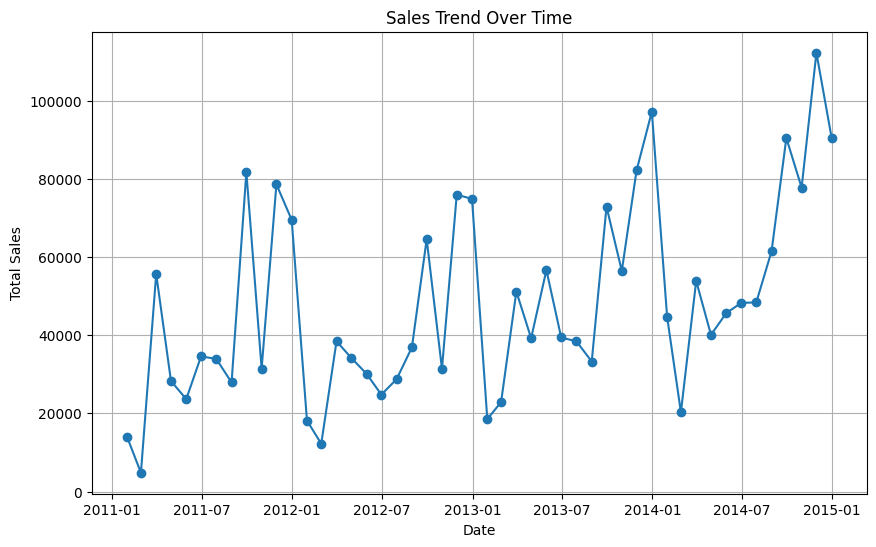

In [16]:
# Plot sales trend over time

plt.figure(figsize=(10, 6))
plt.plot(sales_trend.index, sales_trend['Sales'], marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [19]:
# Group sales by month and year
sales_data['Order Month'] = sales_data['Order Date'].dt.to_period('M')
sales_trend = sales_data.groupby('Order Month')['Sales'].sum().reset_index()

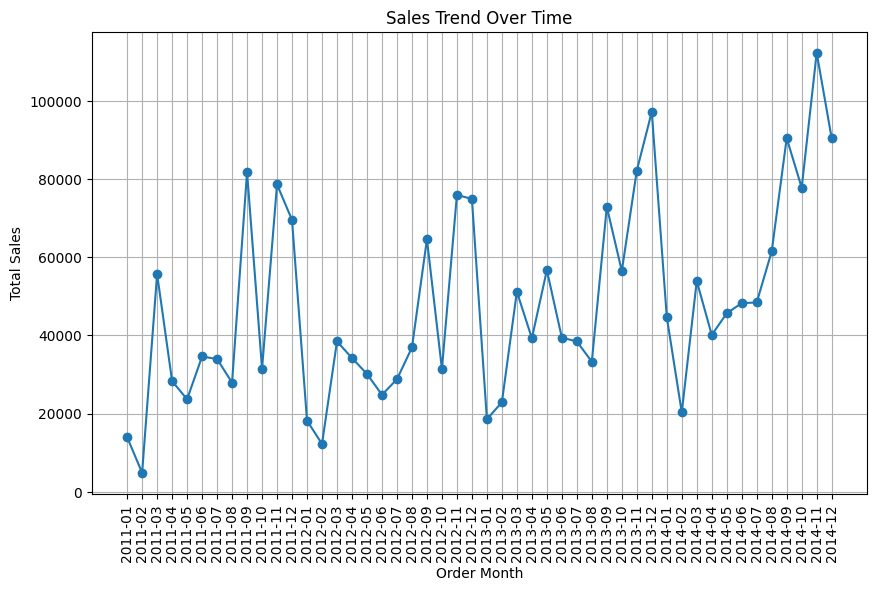

In [20]:
# Plot sales trend over time

plt.figure(figsize=(10, 6))
plt.plot(sales_trend['Order Month'].astype(str), sales_trend['Sales'], marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Order Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

####**5. Best-Selling Products Analysis**

Identifying the best-selling products by calculating total sales for each product.

In [21]:
# Calculate total sales by product
product_sales = sales_data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)

In [22]:
# Display top 5 best-selling products
print("Top 5 Best-Selling Products:")
print(product_sales.head(5))

Top 5 Best-Selling Products:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64


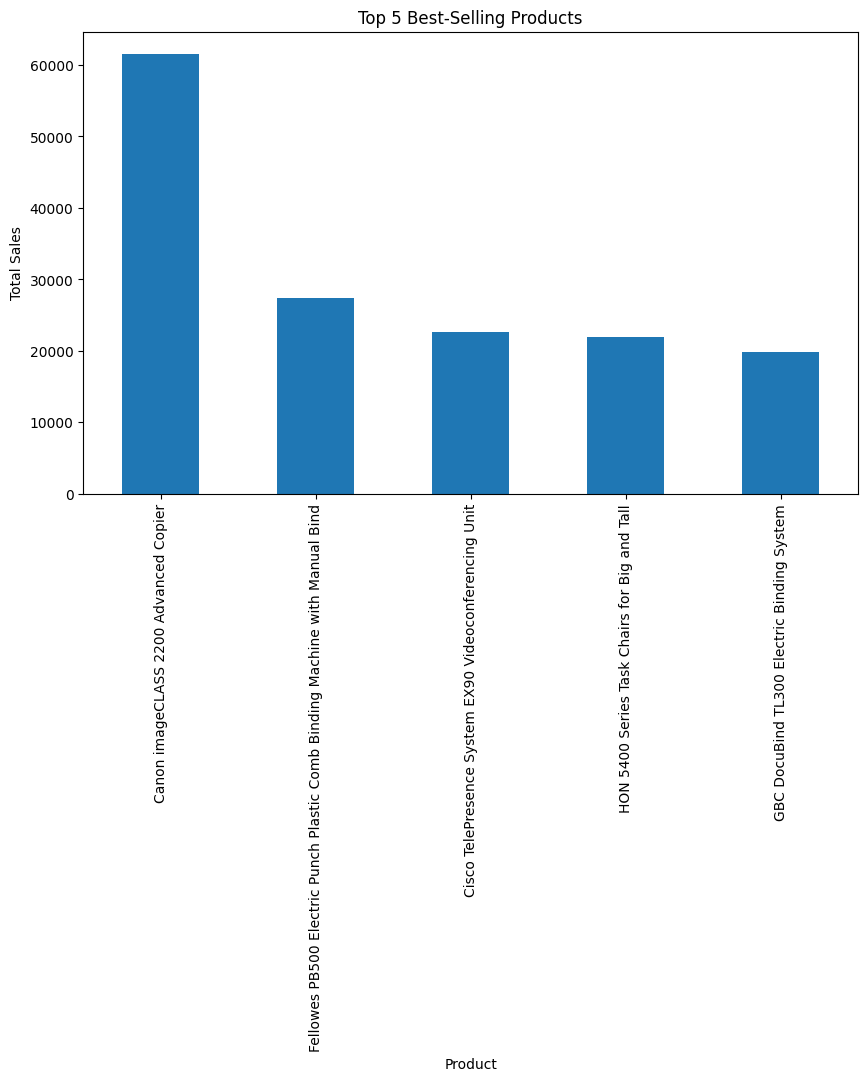

In [23]:
#Plot the best-selling products
plt.figure(figsize=(10, 6))
product_sales.head(5).plot(kind='bar')
plt.title('Top 5 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

####**6. Sales by Category**

Analyzing sales by product category to identify which categories are the most profitable.

In [25]:
# Calculate total sales by category
category_sales = sales_data.groupby('Category')['Sales'].sum().sort_values(ascending=False)

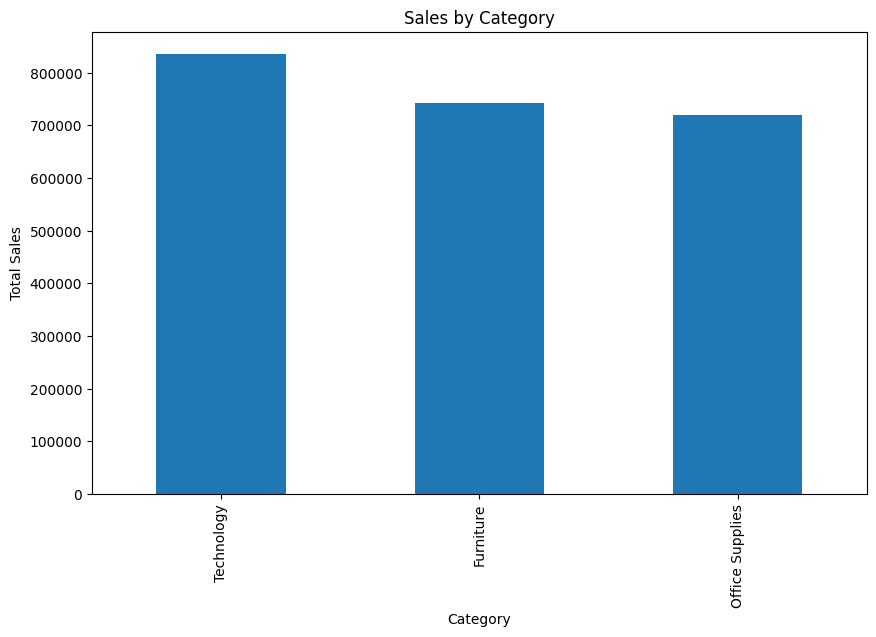

In [27]:
# Plot sales by category
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

####**7. Revenue Indicators and Insights**

Calculating key revenue indicators such as average order value and analyzing profit margins.

In [28]:
# Calculate average order value
average_order_value = sales_data['Sales'].mean()
print(f"Average Order Value: ${average_order_value:.2f}")

Average Order Value: $229.86


In [29]:
# Calculate total profit
total_profit = sales_data['Profit'].sum()
print(f"Total Profit: ${total_profit:.2f}")

Total Profit: $286397.02


Identify patterns such as top-performing regions or time periods

####**8. Conclusion and Recommendations**

Based on the analysis, provide insights and actionable recommendations for improving sales strategies.

In [30]:
summary = f"""
Total Sales: ${total_sales:.2f}
Total Profit: ${total_profit:.2f}
Average Order Value: ${average_order_value:.2f}

Top 3 Best-Selling Products:
1. {product_sales.index[0]}: ${product_sales.iloc[0]:.2f}
2. {product_sales.index[1]}: ${product_sales.iloc[1]:.2f}
3. {product_sales.index[2]}: ${product_sales.iloc[2]:.2f}

Recommendations:
- Focus marketing efforts on the top-selling products to maximize revenue.
- Consider offering promotions on underperforming products or categories to boost sales.
- Optimize inventory management based on sales trends to reduce holding costs.
- Evaluate the shipping costs and order priorities to identify potential areas for cost reduction.
"""

print(summary)


Total Sales: $2297200.86
Total Profit: $286397.02
Average Order Value: $229.86

Top 3 Best-Selling Products:
1. Canon imageCLASS 2200 Advanced Copier: $61599.82
2. Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind: $27453.38
3. Cisco TelePresence System EX90 Videoconferencing Unit: $22638.48

Recommendations:
- Focus marketing efforts on the top-selling products to maximize revenue.
- Consider offering promotions on underperforming products or categories to boost sales.
- Optimize inventory management based on sales trends to reduce holding costs.
- Evaluate the shipping costs and order priorities to identify potential areas for cost reduction.



####**Conclusion**

This project showcases how to analyze a sales dataset to derive valuable insights for business decision-making. By understanding sales trends, best-selling products, and key revenue indicators, you can provide actionable recommendations to optimize sales strategies and improve overall business performance.

#####**- Thank Q, for your Time!**